In [97]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [98]:
# Lets ignore unnecessary warnings
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [99]:
#read the data
df = pd.read_csv("Marketing_data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


1. CUSTID: Identification of Credit Card holder
2. BALANCE: Balance amount left in customer's account to make purchases
3. BALANCE_FREQUENCY: How frequently the Balance is updated score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES: Amount of purchases made from account
5. ONEOFFPURCHASES: Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES: Amount of purchase done in installment
7. CASH_ADVANCE: Cash in advance given by the user
8. PURCHASES_FREQUENCY: How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
10. ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
11. PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
12. CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
13. CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
14. PURCHASES_TRX: Number of purchase transactions made
15. CREDIT_LIMIT: Limit of Credit Card for user
16. PAYMENTS: Amount of Payment done by user
17. MINIMUM_PAYMENTS: Minimum amount of payments made by user
18. PRC_FULL_PAYMENT: Percent of full payment paid by user
19. TENURE: Tenure of credit card service for user


In [100]:
df.shape

(8950, 18)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Looks like there are some null values in MINIMUM PAYMENTS and CREDIT_LIMIT

In [102]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [103]:
#lets see who made ONEOFF_PURCHASE of $40761
df[df["ONEOFF_PURCHASES"] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


Looks like this guys make lot of frequent purchases. But to be noted here is that he isnt using cash advance.

Maybe this guy can be targeted for providing the ads on cash advance or target this customer for providing offeres for cash advace

In [104]:
#Lets see a person with max cash advances
df[df["CASH_ADVANCE"] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


This guys does minimum ONEOFF_PURCHASE

<Axes: >

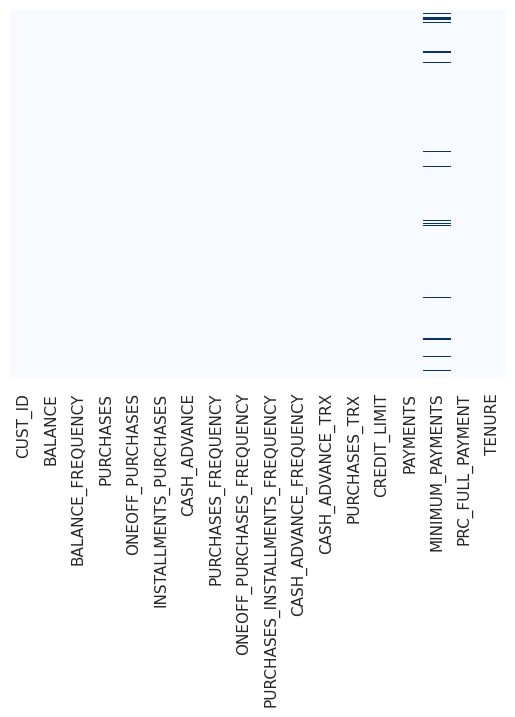

In [105]:
#Checking for missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

In [106]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Lets fill up these values with median

In [107]:
df["CREDIT_LIMIT"].median()

3000.0

In [108]:
#Filling the CREDIT_LIMIT with its median value
df.CREDIT_LIMIT.fillna(df["CREDIT_LIMIT"].median(), inplace = True)

In [109]:
#Filling the MINIMUM_PAYMENTS with its median value
df.MINIMUM_PAYMENTS.fillna(df["MINIMUM_PAYMENTS"].median(), inplace = True)

In [110]:
# Lets check if the is no missing values
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [111]:
#Lets see if there is any duplicates in customer id
df.duplicated().sum()

0

Therefore Customer id is a Unique attribute which can be dropped becuase it doesnt provide any info for us.

In [112]:
df.drop("CUST_ID", axis = 1, inplace = True)

Note:

1. distplot combines the matplotlib.hist function with seaborn kdeplot()
2. KDE Plot represents the Kernel Density Estimate
3. KDE is used for visualizing the Probability Density of a continuous variable.
4. KDE demonstrates the probability density at different values in a continuous variable.

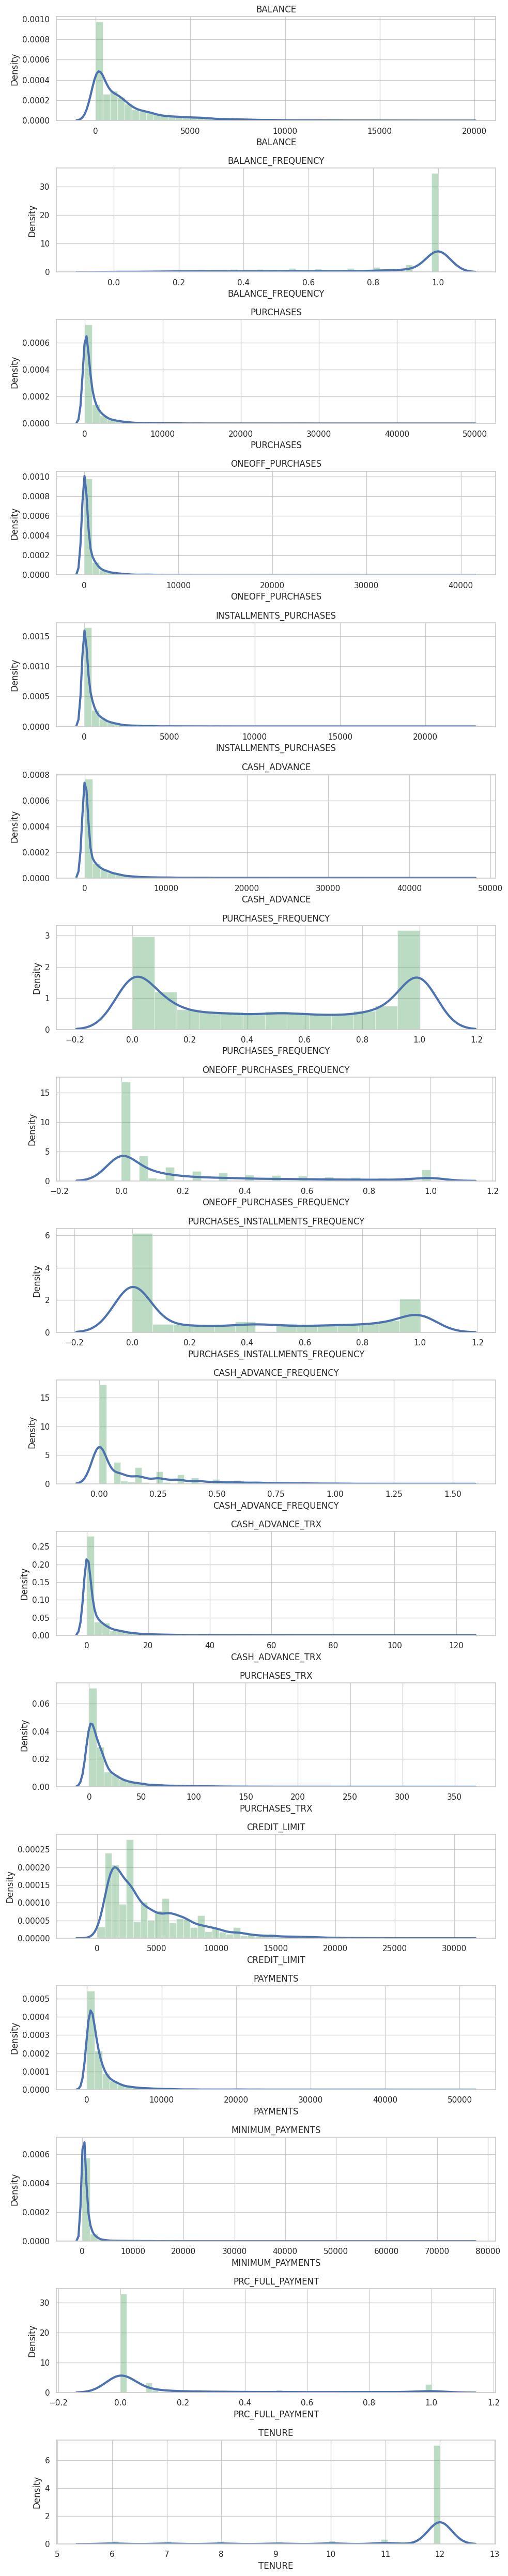

In [113]:
# Lets plot Distplot
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label":None}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

Observations:

1. most of the customer balance is around $1500-2000
2. balance frequency is 1 which means most of the customers use thier credit cards most often, thereby the balance gets updated often.

3. The average purchase is around $1000
4. most of the customers doesnt rely on ONEOFF_Purchases, do purchases in installments, and does less cash advance
5. You can observe purchase frequency, there are 2 different groups of customers: one who does a lot of purchases and one who doesnt. looks like there are equally balanced
6. A lot of customers are around 11 or 12 yrs tenure

<Axes: >

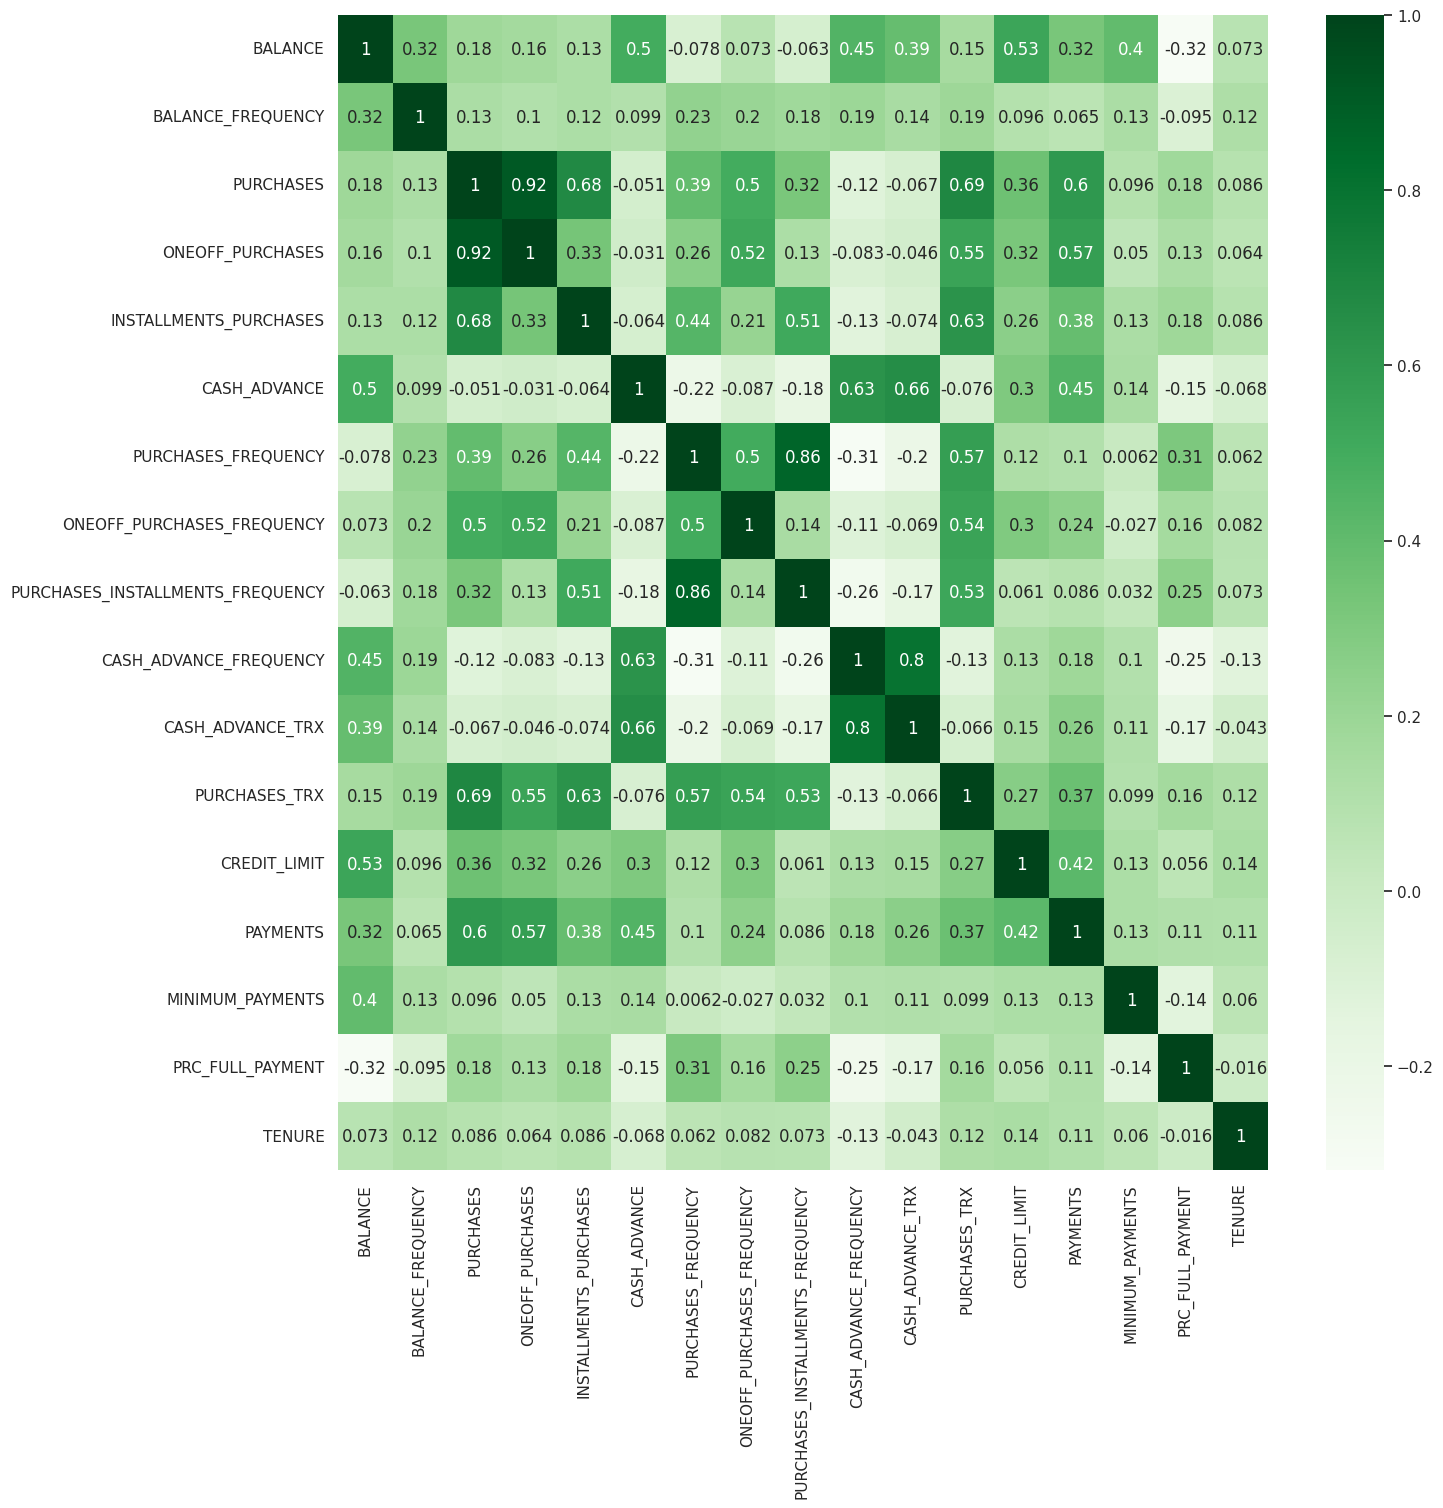

In [114]:
# Lets check the correlations
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True,cmap="Greens", cbar = True)

Looks like purchases and purchases frequency is making a very high correlatrion, which means customers who do purchases does in ONEOFF_Purchases too

As well as a high correlation between purchase installment frequency and purchase frequency.

# Rescaling the data

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [116]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [117]:
df_scaled_DF = pd.DataFrame(df_scaled, columns=df.columns)

In [118]:
df_scaled_DF.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [119]:
df_scaled_DF.shape

(8950, 17)

# Hopkins Statistics

Hopkins statistic function is to find if the dataset is suitable for clustering or not.

In [120]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [121]:
hopkins(df_scaled_DF)

0.968204542063676

A Hopkins Statistic of 0.96 suggests a strong tendency for clustering in this data, and we can proceed with clustering/

# Finding the Optimal Number of Clusters

In [122]:
# Lets make a elbow curve and determine K-clusters
kscores = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled_DF)
  kscores.append(kmeans.inertia_)

Text(0, 0.5, 'within cluster sum of squares(WCSS)')

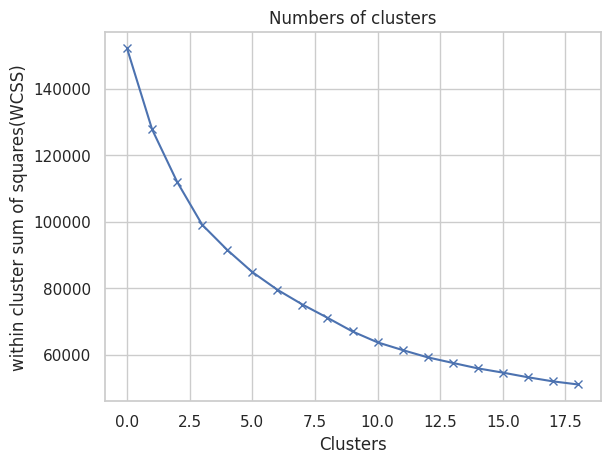

In [123]:
plt.plot(kscores, "bx-")
plt.title("Numbers of clusters")
plt.xlabel("Clusters")
plt.ylabel("within cluster sum of squares(WCSS)")

we can choose the 8 as number of clusters

# K-Means Modeling

In [124]:
kmeans = KMeans(n_clusters=8, max_iter=500)

kmeans.fit(df_scaled_DF)

KMeans(max_iter=500)

In [125]:
kmeans.labels_

array([6, 1, 5, ..., 0, 0, 0], dtype=int32)

In [126]:
kmeans.cluster_centers_.shape

(8, 17)

In [127]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_scaled_DF.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567769,-0.392680,-0.215888,0.014011,-3.203733
1,1.691648,0.395578,-0.218284,-0.156544,-0.228597,2.026874,-0.478632,-0.213098,-0.415543,1.929280,1.943046,-0.267148,1.029128,0.812328,0.518682,-0.394554,0.068883
2,0.922183,0.467535,2.256660,1.722274,2.171760,-0.195314,1.160307,1.552162,1.245501,-0.313553,-0.211258,2.785144,1.225571,1.285330,0.574578,0.290267,0.333992
3,-0.701163,-2.144787,-0.311233,-0.235823,-0.302542,-0.319756,-0.557150,-0.445187,-0.440134,-0.520622,-0.376063,-0.419936,-0.175915,-0.192408,-0.284421,0.283762,0.199336
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044081,8.098975,1.127533,1.110132,0.310863
5,-0.162203,0.392065,0.465128,0.607588,-0.016608,-0.332500,0.943549,1.879243,0.090652,-0.406209,-0.322493,0.530012,0.383754,0.094873,-0.156877,0.407630,0.261770
6,0.017800,0.403887,-0.361919,-0.247244,-0.401409,-0.090679,-0.865969,-0.409885,-0.757514,0.110640,-0.023694,-0.486632,-0.305938,-0.249774,-0.000336,-0.457071,0.272769
7,-0.366639,0.333155,-0.038243,-0.244205,0.358036,-0.363598,0.991214,-0.386909,1.206355,-0.475154,-0.361158,0.187123,-0.260777,-0.217616,-0.039105,0.315794,0.257381


In [128]:
# assign the label
df_scaled_DF['cluster_id'] = kmeans.labels_
df_scaled_DF.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,6
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,1
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,5
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,6
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,6


In [129]:
df_scaled_DF['cluster_id'].unique()

array([6, 1, 5, 7, 2, 3, 0, 4], dtype=int32)

In [130]:
df_scaled_DF[df_scaled_DF["cluster_id"] == 0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
16,0.243872,-0.009586,-0.469552,-0.356934,-0.454576,0.860927,-1.221758,-0.678661,-0.916995,0.573963,-0.036462,-0.591796,-0.410693,-0.463287,-0.200769,-0.525551,-2.628285,0
46,-0.523695,-1.592594,-0.418188,-0.356934,-0.333221,0.016589,-0.287408,-0.678661,-0.287947,-0.050693,-0.329534,-0.471102,-0.767988,-0.537887,-0.299103,-0.525551,-2.628285,0
66,-0.362555,-0.009586,-0.469552,-0.356934,-0.454576,-0.033594,-1.221758,-0.678661,-0.916995,-0.050693,-0.329534,-0.591796,-0.822957,-0.548229,-0.285294,-0.525551,-2.628285,0
72,-0.436463,0.518084,-0.469552,-0.356934,-0.454576,0.236275,-1.221758,-0.678661,-0.916995,-0.050693,-0.036462,-0.591796,0.688678,-0.284184,-0.301768,0.329200,-2.628285,0
99,-0.751640,-3.703271,-0.469552,-0.356934,-0.454576,-0.423940,-1.221758,-0.678661,-0.916995,0.038543,-0.329534,-0.591796,-0.410693,-0.551011,-0.228307,-0.525551,-3.375526,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768,0
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768,0
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768,0
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768,0


In [131]:
df_scaled_DF[df_scaled_DF["cluster_id"] == 1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680,1
15,2.556788,0.518084,0.284807,-0.356934,1.327711,0.630706,0.024043,-0.678661,0.341102,0.157527,0.110074,-0.149251,0.963521,0.089915,0.542299,-0.525551,0.360680,1
23,1.074113,-0.249434,1.518896,1.724383,0.423231,3.335903,1.269843,-0.399319,1.389517,0.990398,1.428897,-0.068789,1.238364,2.675704,0.248866,-0.525551,0.360680,1
28,2.684898,0.518084,-0.288392,-0.233696,-0.252760,0.599545,0.439310,-0.119974,0.131420,3.489021,1.868505,-0.269945,1.650628,-0.045492,0.344647,-0.525551,0.360680,1
30,5.079113,0.518084,0.952394,0.253503,1.784546,1.051341,1.269843,-0.119974,1.599199,1.823274,0.989289,1.983008,2.337735,0.862613,1.049063,-0.525551,0.360680,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,2.756873,0.518084,-0.469552,-0.356934,-0.454576,4.665531,-1.221758,-0.678661,-0.916995,3.072586,2.308113,-0.591796,1.238364,0.722361,0.587140,-0.525551,0.360680,1
8795,-0.041503,-0.326187,-0.354874,-0.209319,-0.454576,1.620686,-0.972598,-0.343450,-0.916995,2.322999,2.747720,-0.551565,-0.548114,0.495919,0.052174,-0.525551,-1.133803,1
8813,0.850661,-0.748323,-0.469552,-0.356934,-0.454576,2.310199,-1.221758,-0.678661,-0.916995,0.823825,-0.036462,-0.591796,0.688678,-0.276960,0.069481,-0.525551,-1.133803,1
8857,0.367898,0.518084,0.148277,-0.356934,1.005136,6.651220,-0.153930,-0.678661,-0.198083,2.180223,0.989289,-0.471102,1.513207,2.219254,-0.240731,0.158250,-3.375526,1


In [132]:
df_scaled_DF[df_scaled_DF["cluster_id"] == 2]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.983008,2.475157,1.596313,-0.277297,2.893453,0.36068,2
21,2.308552,0.518084,2.507235,3.203770,0.042954,-0.357571,1.269843,2.394110,1.599199,0.990398,0.403146,3.109485,1.856760,0.119111,0.349330,-0.525551,0.36068,2
90,3.755512,0.518084,1.917545,0.334615,3.915980,-0.289995,1.269843,0.159367,1.389517,-0.258913,-0.329534,1.258845,1.238364,1.615375,3.850596,-0.525551,0.36068,2
102,0.949031,0.518084,0.852133,0.571138,0.964651,-0.466786,1.062211,2.394110,1.179833,-0.675349,-0.476070,2.425553,0.331383,2.569912,0.539679,-0.240635,0.36068,2
109,2.440515,0.518084,1.626735,1.282780,1.488567,2.969247,1.269843,2.394110,1.599199,2.239710,2.601184,1.983008,1.238364,3.152024,0.696485,-0.240635,0.36068,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,1.715217,0.518084,0.701673,0.046128,1.572810,-0.466786,0.854576,-0.399319,1.179833,-0.675349,-0.476070,2.103702,0.413836,-0.416252,10.488984,-0.525551,0.36068,2
8215,1.379870,0.518084,2.341521,3.160596,-0.269325,-0.195942,1.269843,1.276737,1.389517,-0.258913,-0.329534,1.862314,1.650628,-0.028574,0.095431,-0.525551,0.36068,2
8541,0.846466,0.518084,3.373046,0.979544,6.171070,-0.466786,1.269843,0.718054,1.599199,-0.675349,-0.476070,4.638275,1.513207,0.072172,-0.060875,-0.240635,0.36068,2
8662,-0.463418,0.518084,1.846050,1.540643,1.533431,-0.466786,1.269843,2.673451,1.389517,-0.675349,-0.476070,2.345090,-0.410693,1.136925,-0.268678,-0.240635,0.36068,2


# Silhouette Analysis

Measuring the goodness of the clustures created

In [133]:
df_scaled_DF2 = df_scaled_DF.copy()
df_scaled_DF2.drop(columns = ['cluster_id'], axis = 1, inplace = True)

In [134]:
# silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,20)

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500)
    kmeans.fit(df_scaled_DF2)
    #df_scaled_DF2['cluster_id'] = kmeans.labels_
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled_DF2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))



For n_clusters=2, the silhouette score is 0.21017330648467983
For n_clusters=3, the silhouette score is 0.2505994020020264
For n_clusters=4, the silhouette score is 0.1976791965228765
For n_clusters=5, the silhouette score is 0.19325195080511473
For n_clusters=6, the silhouette score is 0.20274139722268342
For n_clusters=7, the silhouette score is 0.21517913074628572
For n_clusters=8, the silhouette score is 0.2192540853621642
For n_clusters=9, the silhouette score is 0.2270324035008201
For n_clusters=10, the silhouette score is 0.22404234156627836
For n_clusters=11, the silhouette score is 0.21628212820681497
For n_clusters=12, the silhouette score is 0.22101586581462976
For n_clusters=13, the silhouette score is 0.2188534354641502
For n_clusters=14, the silhouette score is 0.21938023764055586
For n_clusters=15, the silhouette score is 0.22167730803889485
For n_clusters=16, the silhouette score is 0.2010095820576299
For n_clusters=17, the silhouette score is 0.2048185841721922
For n_c

In [135]:
df_scaled_DF.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,6
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,1
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,5
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,6
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,6


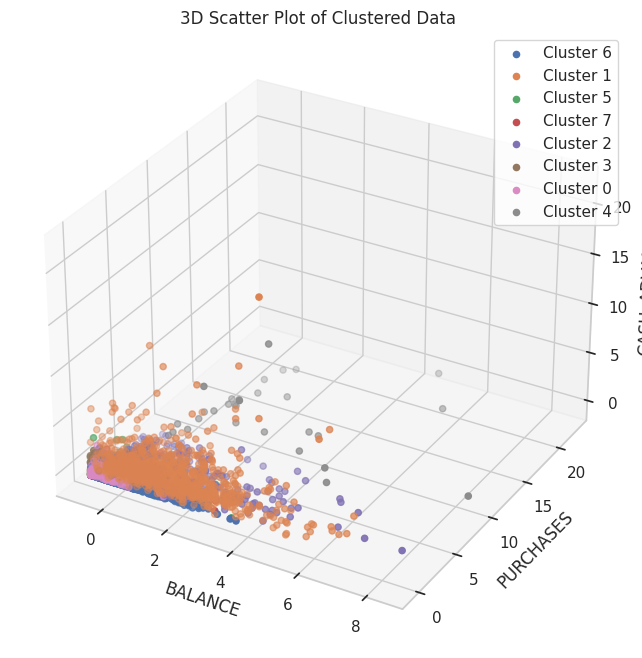

In [137]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your data is stored in a DataFrame called 'df'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different clusters
for cluster_id in df_scaled_DF['cluster_id'].unique():
    cluster_data = df_scaled_DF[df_scaled_DF['cluster_id'] == cluster_id]
    ax.scatter(cluster_data['BALANCE'], cluster_data['PURCHASES'], cluster_data['CASH_ADVANCE'], label=f'Cluster {cluster_id}')

ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('CASH_ADVANCE')

plt.title('3D Scatter Plot of Clustered Data')
plt.legend()
plt.show()


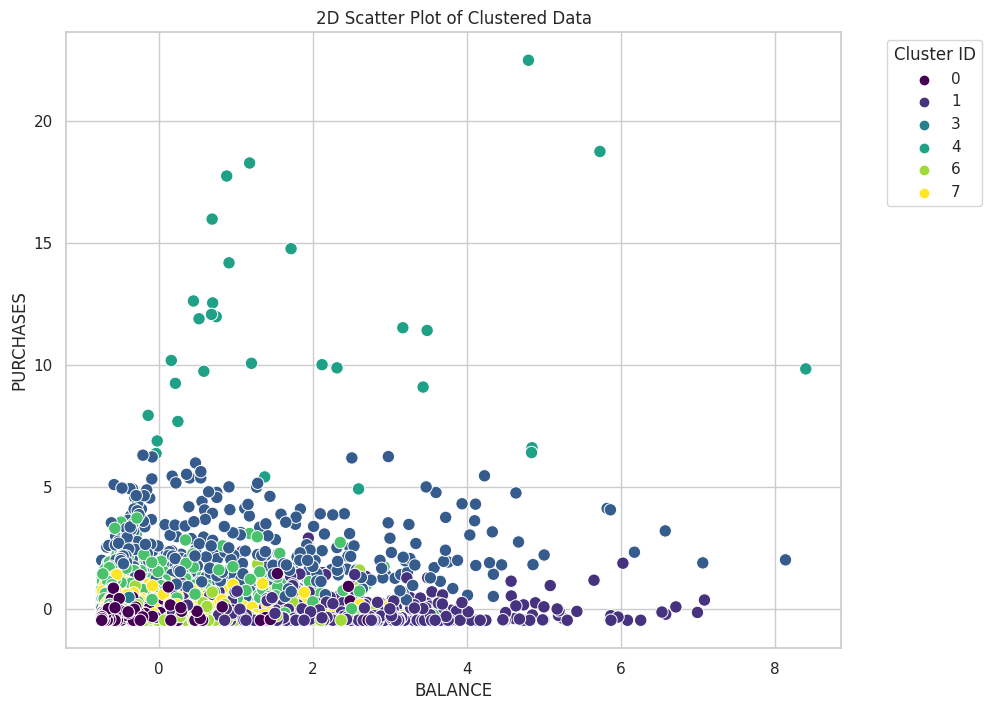

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
plt.figure(figsize=(10, 8))

# Scatter plot with different clusters
sns.scatterplot(x='BALANCE', y='PURCHASES', hue='cluster_id', palette='viridis', data=df_scaled_DF, s=80)

plt.title('2D Scatter Plot of Clustered Data')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [141]:
df_scaled_DF.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster_id'],
      dtype='object')

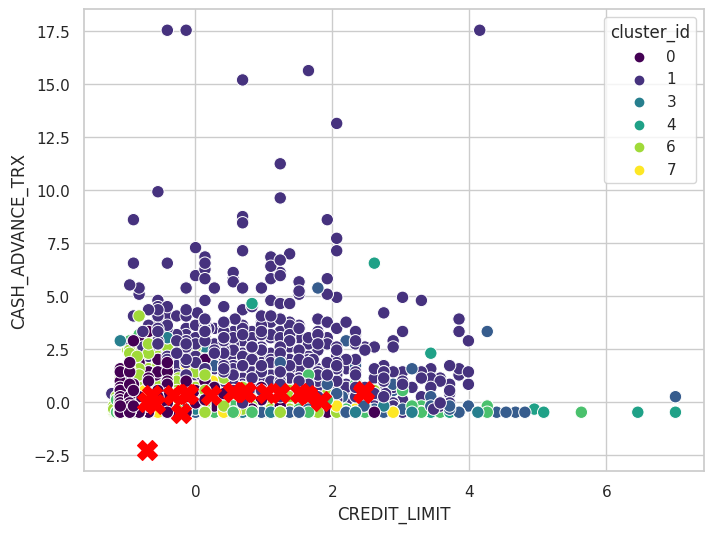

In [155]:
# Create a cluster plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Scatter plot with hue based on cluster labels
sns.scatterplot(x='CREDIT_LIMIT', y='CASH_ADVANCE_TRX', hue='cluster_id', data=df_scaled_DF, palette='viridis', edgecolor='w', s=80)

# Plot cluster centers if applicable (for KMeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Cluster Centers')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
plt.figure(figsize=(15, 10))

# Set the number of clusters
num_clusters = df_scaled_DF['cluster_id'].nunique()

# Create subplots for each cluster
for i in range(1, num_clusters + 1):
    plt.subplot(2, 4, i)  # Assuming 7 clusters, adjust based on your actual number of clusters
    cluster_data = df_scaled_DF[df_scaled_DF['cluster_id'] == i-1]

    # Scatter plot for each cluster
    sns.scatterplot(x='BALANCE', y='PURCHASES', data=cluster_data, s=80)

    plt.title(f'Cluster {i}')
    plt.xlabel('BALANCE')
    plt.ylabel('PURCHASES')

plt.suptitle('2D Scatter Plots of Clusters', y=1.02)
plt.tight_layout()
plt.show()


--------------------


In [148]:
Temp_DF = df.copy()

In [149]:
# assign the label
Temp_DF['cluster_id'] = kmeans.labels_
Temp_DF.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,10
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,10
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,10


In [151]:
Temp_DF.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster_id'],
      dtype='object')

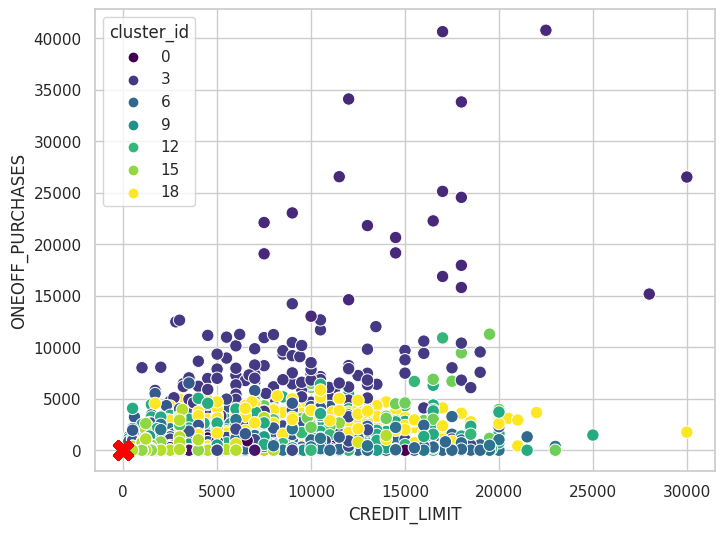

In [152]:
# Create a cluster plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Scatter plot with hue based on cluster labels
sns.scatterplot(x='CREDIT_LIMIT', y='ONEOFF_PURCHASES', hue='cluster_id', data=Temp_DF, palette='viridis', edgecolor='w', s=80)

# Plot cluster centers if applicable (for KMeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Cluster Centers')


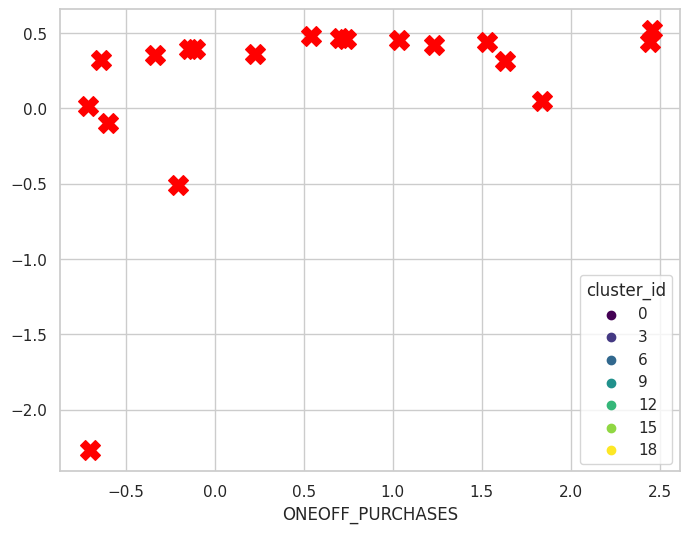

In [153]:
# Create a cluster plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Scatter plot with hue based on cluster labels
sns.scatterplot(x='ONEOFF_PURCHASES', hue='cluster_id', data=Temp_DF, palette='viridis', edgecolor='w', s=80)

# Plot cluster centers if applicable (for KMeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Cluster Centers')
